<a href="https://colab.research.google.com/github/hamza-alkaabneh/project/blob/main/lobani.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[link text](https://)# New Section

# New Section

In [1]:
# Step 1: Move and configure the uploaded Kaggle API key file
!mkdir -p ~/.kaggle
!cp "kaggle (1).json" ~/.kaggle/kaggle.json
!chmod 600 ~/.kaggle/kaggle.json

# Step 2: Download the dataset using Kaggle API
!kaggle datasets download -d vjchoudhary7/customer-segmentation-tutorial-in-python

# Step 3: Unzip the downloaded dataset
!unzip customer-segmentation-tutorial-in-python.zip


cp: cannot stat 'kaggle (1).json': No such file or directory
chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory
Traceback (most recent call last):
  File "/usr/local/bin/kaggle", line 10, in <module>
    sys.exit(main())
             ^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/kaggle/cli.py", line 68, in main
    out = args.func(**command_args)
          ^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/kaggle/api/kaggle_api_extended.py", line 1741, in dataset_download_cli
    with self.build_kaggle_client() as kaggle:
         ^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/kaggle/api/kaggle_api_extended.py", line 688, in build_kaggle_client
    username=self.config_values['username'],
             ~~~~~~~~~~~~~~~~~~^^^^^^^^^^^^
KeyError: 'username'
unzip:  cannot find or open customer-segmentation-tutorial-in-python.zip, customer-segmentation-tutorial-in-python.zip.zip or customer-segmentation-tuto

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN, KMeans
from sklearn.metrics import silhouette_score
from sklearn.neighbors import NearestNeighbors

In [3]:
df = pd.read_csv("Mall_Customers.csv")
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [6]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [7]:
df.isnull().sum()

,0
CustomerID,0
Gender,0
Age,0
Annual Income (k$),0
Spending Score (1-100),0


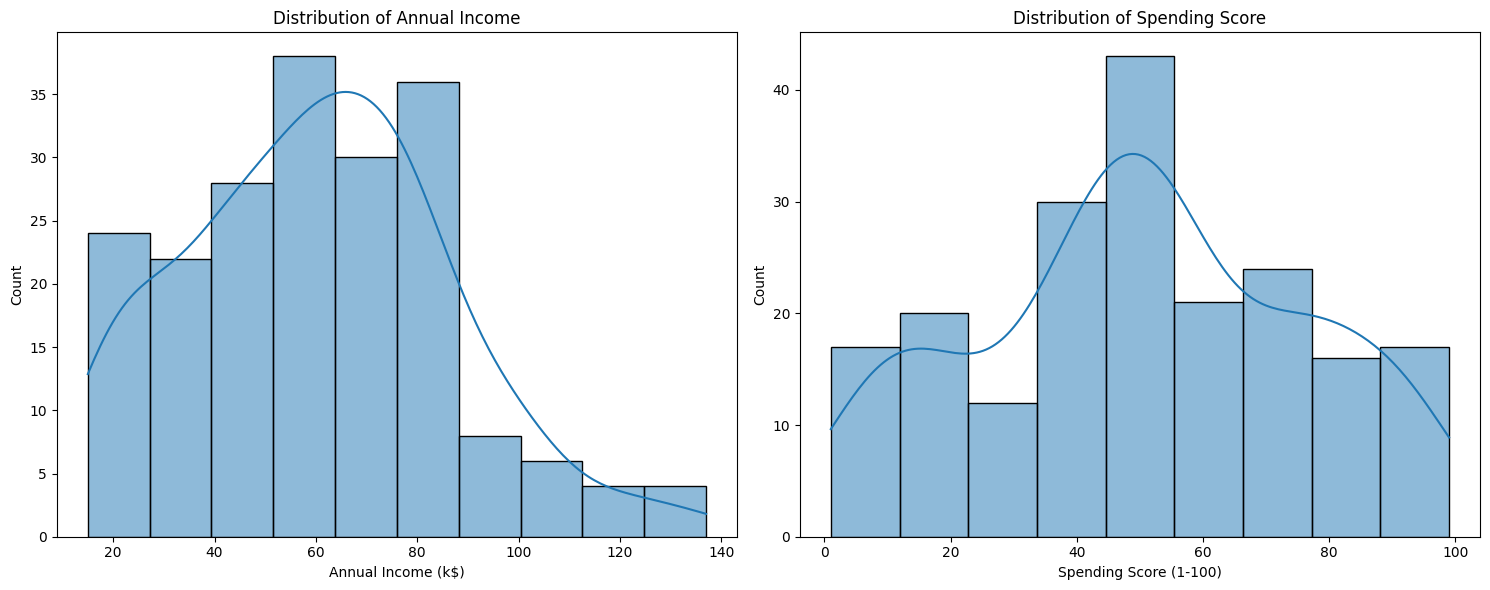

"\n\nThe histograms reveal the distribution of key features (whether they're normally distributed, skewed, or multimodal), which impacts clustering\n\n"

In [8]:
plt.figure(figsize=(15, 6))

plt.subplot(1, 2, 1)
sns.histplot(df['Annual Income (k$)'], kde=True)
plt.title('Distribution of Annual Income')

plt.subplot(1, 2, 2)
sns.histplot(df['Spending Score (1-100)'], kde=True)
plt.title('Distribution of Spending Score')

plt.tight_layout()
plt.show()




"""

The histograms reveal the distribution of key features (whether they're normally distributed, skewed, or multimodal), which impacts clustering

"""

<Figure size 1000x800 with 0 Axes>

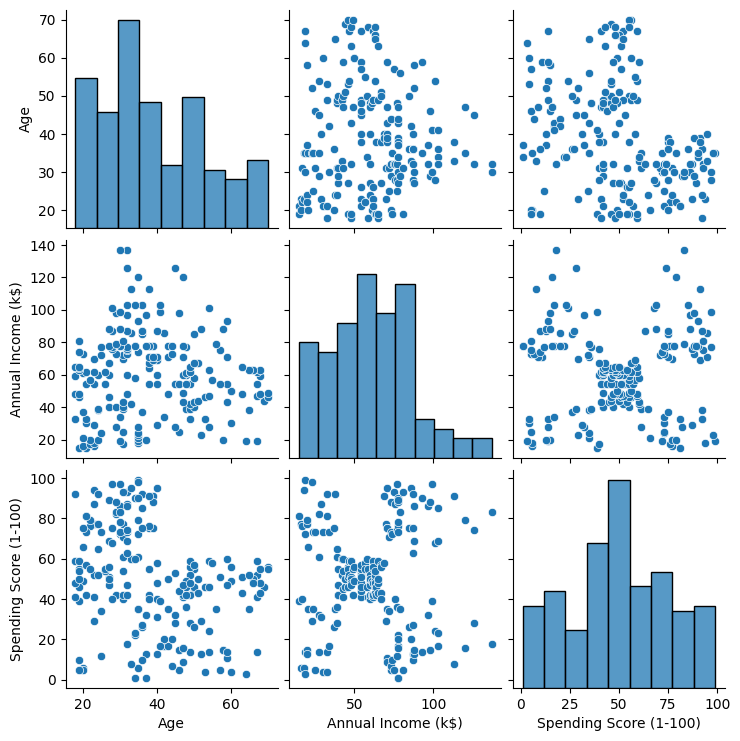

In [9]:
# See relationships between features

plt.figure(figsize=(10, 8))
sns.pairplot(df, vars=['Age', 'Annual Income (k$)', 'Spending Score (1-100)'])
plt.show()

**Data Preprocessing**

In [10]:
X = df[['Annual Income (k$)', 'Spending Score (1-100)']]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

feature_names = X.columns

"""

Without standardization, features with larger scales  would dominate the distance calculations

The eps parameter in DBSCAN becomes easier to interpret on standardized data
"""

'\n\nWithout standardization, features with larger scales  would dominate the distance calculations\n\nThe eps parameter in DBSCAN becomes easier to interpret on standardized data\n'

**Finding Optimal DBSCAN Parameters**

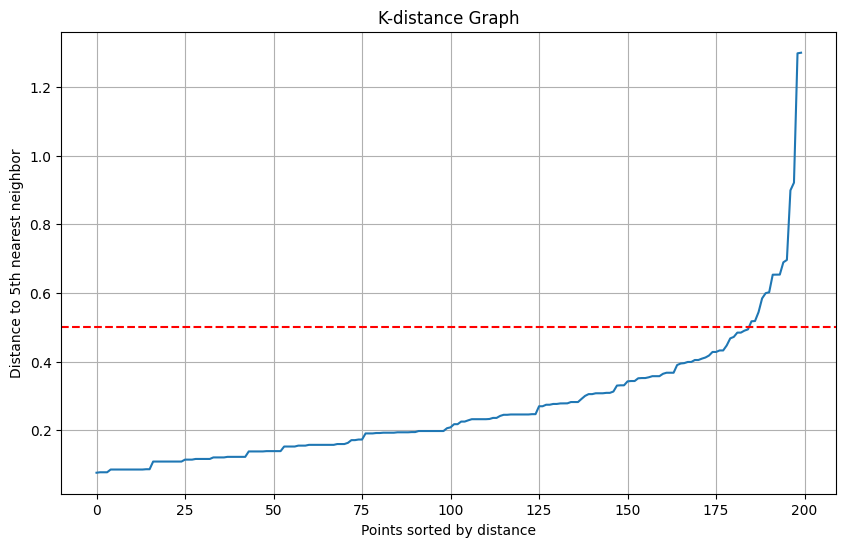

"\nI used k=5 because it's a common starting point for min_samples and provides a good balance between noise sensitivity and cluster detection\n\n"

In [11]:
k = 5
nbrs = NearestNeighbors(n_neighbors=k).fit(X_scaled)
distances, indices = nbrs.kneighbors(X_scaled)

dist_sorted = np.sort(distances[:, k-1])
plt.figure(figsize=(10, 6))
plt.plot(range(len(dist_sorted)), dist_sorted)
plt.xlabel('Points sorted by distance')
plt.ylabel(f'Distance to {k}th nearest neighbor')
plt.title('K-distance Graph')
plt.grid(True)

plt.axhline(y=0.5, color='r', linestyle='--')  #
plt.show()

"""
I used k=5 because it's a common starting point for min_samples and provides a good balance between noise sensitivity and cluster detection

"""

In [12]:
# Grid search for eps and min_samples
eps_values = np.arange(0.4, 0.7, 0.05)
min_samples_values = range(3, 15)

results = []

for eps in eps_values:
    for min_samples in min_samples_values:
        # Fit DBSCAN
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        cluster_labels = dbscan.fit_predict(X_scaled)

        # Count noise points (-1)
        n_clusters = len(set(cluster_labels)) - (1 if -1 in cluster_labels else 0)
        n_noise = list(cluster_labels).count(-1)

        # Calculate silhouette score if there are multiple clusters and no all-noise
        sil_score = np.nan
        if n_clusters > 1 and n_noise < len(X_scaled):
            # Only calculate for non-noise points
            mask = cluster_labels != -1
            if np.sum(mask) > 1:  # Need at least 2 samples for silhouette
                sil_score = silhouette_score(X_scaled[mask], cluster_labels[mask])

        results.append({
            'eps': eps,
            'min_samples': min_samples,
            'n_clusters': n_clusters,
            'n_noise': n_noise,
            'noise_ratio': n_noise / len(X_scaled),
            'silhouette': sil_score
        })

# Convert to DataFrame for analysis
results_df = pd.DataFrame(results)


"""
The grid search tests multiple combinations of eps and min_samples
"""


'\nThe grid search tests multiple combinations of eps and min_samples\n'

In [13]:
best_params = results_df.loc[results_df['silhouette'].idxmax()]
print("Best parameters based on silhouette score:")
print(best_params)

Best parameters based on silhouette score:
eps             0.400000
min_samples    13.000000
n_clusters      3.000000
n_noise        73.000000
noise_ratio     0.365000
silhouette      0.645792
Name: 10, dtype: float64


In [17]:
# Use the best parameters found
best_eps = best_params['eps']
best_min_samples = int(best_params['min_samples'])

# Apply DBSCAN with best parameters
dbscan = DBSCAN(eps=best_eps, min_samples=best_min_samples)
dbscan_labels = dbscan.fit_predict(X_scaled)

# Add cluster labels to the original dataframe
df['DBSCAN_Cluster'] = dbscan_labels

# Analyze clusters
cluster_stats = df.groupby('DBSCAN_Cluster').agg({
    'Age': ['mean', 'min', 'max'],
    'Annual Income (k$)': ['mean', 'min', 'max'],
    'Spending Score (1-100)': ['mean', 'min', 'max'],
    'CustomerID': 'count'
}).rename(columns={'CustomerID': 'Count'})

print("DBSCAN Cluster Statistics:")
print(cluster_stats)

"""
Mean --> show the central tendency of each cluster
Min/max --> show the range within each cluster
Count --> how many customers fall into each segment
"""

"""
noise data represent:
Potential VIP customers
Data entry errors
Transition customers between segments
"""

DBSCAN Cluster Statistics:
                      Age         Annual Income (k$)           \
                     mean min max               mean min  max   
DBSCAN_Cluster                                                  
-1              36.000000  18  67          57.041096  15  137   
 0              42.821429  18  70          54.702381  38   76   
 1              40.352941  19  59          79.000000  71   88   
 2              33.038462  27  40          77.307692  69   88   

               Spending Score (1-100)         Count  
                                 mean min max count  
DBSCAN_Cluster                                       
-1                          48.246575   1  99    73  
 0                          49.369048  34  65    84  
 1                          12.352941   5  22    17  
 2                          83.115385  71  97    26  


'\nnoise data represent:\nPotential VIP customers\nData entry errors\nTransition customers between segments\n'

In [18]:
# Analyze noise points specifically
noise_points = df[df['DBSCAN_Cluster'] == -1]
print("\nNoise Points Statistics:")
noise_points.describe()


Noise Points Statistics:


,CustomerID,Age,Annual Income (k$),Spending Score (1-100),DBSCAN_Cluster
count,73.000000,73.000000,73.000000,73.000000,73.0
mean,89.136986,36.000000,57.041096,48.246575,-1.0
std,80.474343,11.944315,39.401931,31.936474,0.0
min,1.000000,18.000000,15.000000,1.000000,-1.0
25%,19.000000,28.000000,23.000000,17.000000,-1.0
50%,37.000000,35.000000,34.000000,39.000000,-1.0
75%,182.000000,45.000000,97.000000,77.000000,-1.0
max,200.000000,67.000000,137.000000,99.000000,-1.0


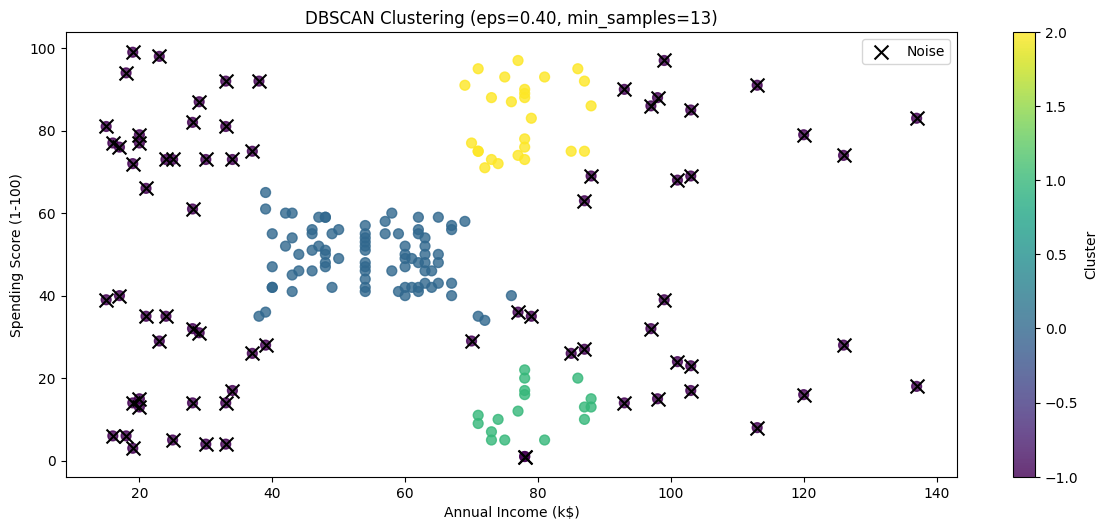

In [19]:
plt.figure(figsize=(12, 10))

# First plot - DBSCAN clusters

plt.subplot(2, 1, 1)

scatter = plt.scatter(X[feature_names[0]], X[feature_names[1]], c=dbscan_labels, cmap='viridis', s=50, alpha=0.8)


plt.colorbar(scatter, label='Cluster')
plt.title(f'DBSCAN Clustering (eps={best_eps:.2f}, min_samples={best_min_samples})')
plt.xlabel(feature_names[0])
plt.ylabel(feature_names[1])

noise_mask = dbscan_labels == -1

plt.scatter(X.loc[noise_mask, feature_names[0]], X.loc[noise_mask, feature_names[1]], c='black', marker='x', s=100, label='Noise')


plt.legend()

plt.tight_layout()
plt.show()




In [20]:
# Determine optimal K for K-Means using elbow method
inertia = []
k_range = range(1, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)


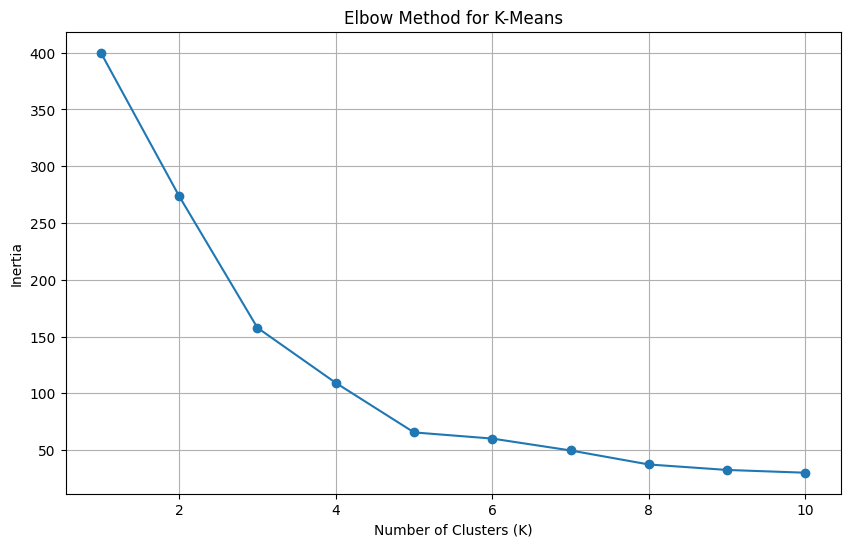

'\nWith 5 clusters\n\nHigh income, high spending\nHigh income, low spending\nAverage income, average spending\nLow income, high spending\nLow income, low spending\n\n'

In [21]:

optimal_k = 5
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
kmeans_labels = kmeans.fit_predict(X_scaled)

# Plot elbow curve
plt.figure(figsize=(10, 6))
plt.plot(k_range, inertia, marker='o')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.title('Elbow Method for K-Means')
plt.grid(True)
plt.show()


"""
With 5 clusters

High income, high spending
High income, low spending
Average income, average spending
Low income, high spending
Low income, low spending

"""

Text(0, 0.5, 'Spending Score (1-100)')

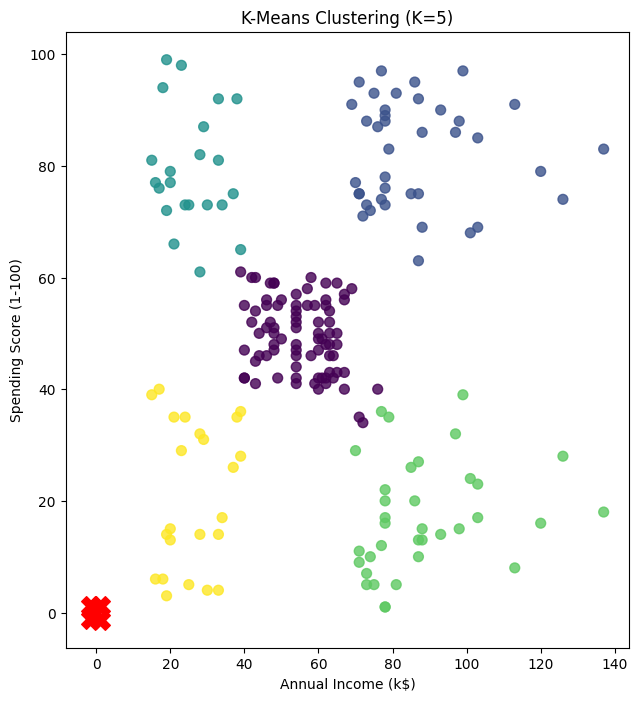

In [22]:
df['KMeans_Cluster'] = kmeans_labels

plt.figure(figsize=(16, 8))

plt.subplot(1, 2, 1)
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=kmeans_labels, cmap='viridis', s=50, alpha=0.8)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='red', marker='X', s=200)
plt.title(f'K-Means Clustering (K={optimal_k})')
plt.xlabel(feature_names[0])
plt.ylabel(feature_names[1])

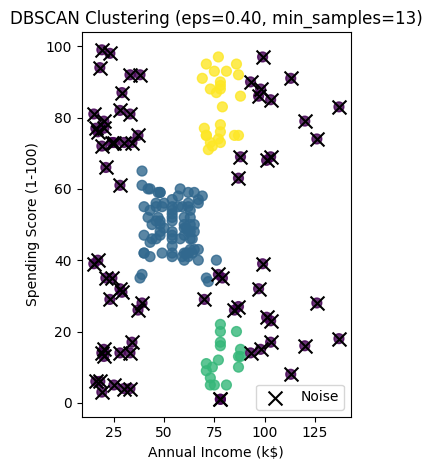

In [23]:
plt.subplot(1, 2, 2)
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=dbscan_labels, cmap='viridis', s=50, alpha=0.8)
plt.title(f'DBSCAN Clustering (eps={best_eps:.2f}, min_samples={best_min_samples})')
plt.xlabel(feature_names[0])
plt.ylabel(feature_names[1])
plt.scatter(X.iloc[noise_mask, 0], X.iloc[noise_mask, 1], c='black', marker='x', s=100, label='Noise')
plt.legend()

plt.tight_layout()
plt.show()